# Задание 1 Вариант 34

## Нахождение матрицы A

In [1]:
import numpy as np
from numpy.linalg import norm
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm, trange

In [2]:
def generate_A(n):
    a = np.array([2 * k for k in range(1, n + 1)])
    b = np.array([(n + 2 - k) ** (-1) for k in range(1, n + 1)])
    columns = [a ** b[j] for j in range(n)]
    A = np.column_stack(columns)
    return A

In [3]:
def is_oscillation_matrix(M):
    main_diag = np.diag(M)
    low_diag = np.diag(M, k=-1)
    up_diag = np.diag(M, k=1)
    deter = np.linalg.det(M)
    return np.all(M >= 0) and \
           np.all(main_diag > 0) and np.all(up_diag > 0) and np.all(low_diag > 0) and \
           deter > 0

In [4]:
is_oscillation_matrix(generate_A(10))

True

In [5]:
def cond(m: np.array) -> float:
    M_inv = np.linalg.inv(m)
    return norm(M_inv) * norm(m)

In [6]:
max_n = 1000
eps = 10 ** (-12)
errors = []
cond_A = []
cond_B = []
pbar = trange(2, max_n)
N = None
for n in pbar:
    A = generate_A(n)
    B = scipy.linalg.sqrtm(A)
    B_squared = np.matmul(B, B)
    error = np.linalg.norm(A - B_squared)
    pbar.set_postfix({'error': error})
    errors.append(error)
    cond_A.append(cond(A))
    cond_B.append(cond(B))
    if error > eps:
        print(f'Found matrix with error > {eps}. N = {n}')
        N = n
        break

 13%|█▎        | 126/998 [00:05<00:38, 22.40it/s, error=1.03e-12]

Found matrix with error > 1e-12. N = 128


In [7]:
sns.set({'figure.figsize':(8,4.5)})

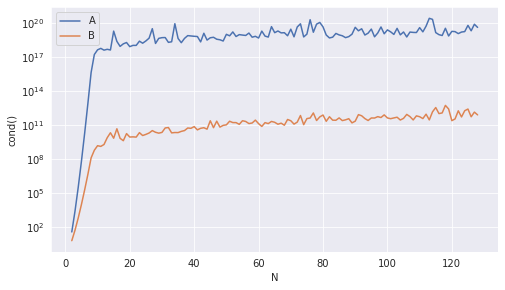

In [8]:
ax1 = sns.lineplot(x=list(range(2, N + 1)), y=cond_A, label='A')
ax2 = sns.lineplot(x=list(range(2, N + 1)), y=cond_B, label='B')
ax2.set(xlabel='N', ylabel='cond()', yscale='log')
plt.show()

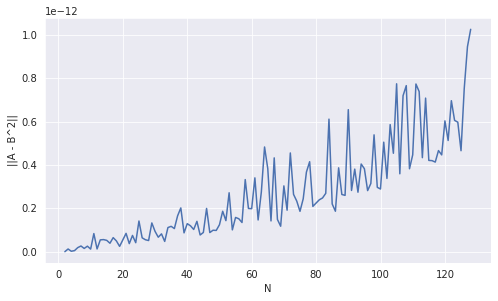

In [9]:
ax = sns.lineplot(x=list(range(2, N + 1)), y=errors)
ax.set(xlabel='N', ylabel='||A - B^2||')
plt.show()

## Решение СЛАУ

In [10]:
def generate_u(A):
    n = A.shape[0]
    z = np.ones((n, 1))
    return np.matmul(A, z)

In [11]:
def first_method(A, u, alpha) -> np.ndarray:
    A_star = np.conjugate(A)
    left_part = np.matmul(A_star, A) + alpha * np.eye(A.shape[0])
    right_part = np.matmul(A_star, u)
    return np.linalg.solve(left_part, right_part)

def second_method(A, u, alpha) -> np.ndarray:
    B = scipy.linalg.sqrtm(A)
    B_star = np.conjugate(B)
    left_part = np.matmul(B_star, B) + alpha * np.eye(A.shape[0])
    B_inv = np.linalg.inv(B)
    right_part = np.matmul(B_star, np.matmul(B_inv, u))
    return np.linalg.solve(left_part, right_part)

In [12]:
def get_error(A, u, x) -> float:
    u_predicted = np.matmul(A, x)
    return norm(u - u_predicted) / norm(u)

In [17]:
scores = {first_method: [], second_method: []}
alphas = []
a = []
A = generate_A(N)
u = generate_u(A)
for a in tqdm(np.logspace(-15, 0, num=300)):
    alphas.append(a)
    for method, score in scores.items():
        x = method(A, u, a)
        score.append(get_error(A, u, x))

100%|██████████| 300/300 [00:33<00:00,  8.92it/s]


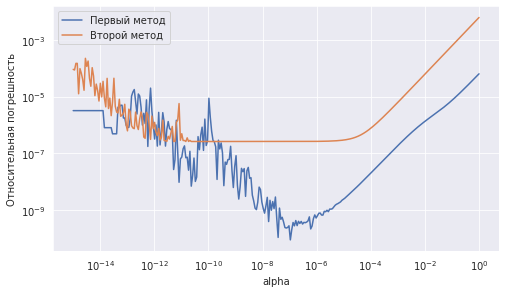

In [18]:
ax1 = sns.lineplot(x=alphas, y=scores[first_method], label='Первый метод')
ax2 = sns.lineplot(x=alphas, y=scores[second_method], label='Второй метод')
ax2.set(xlabel='alpha', ylabel='Относительная погрешность', xscale='log', yscale='log')
plt.show()